In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('events.csv',low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [5]:
df.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


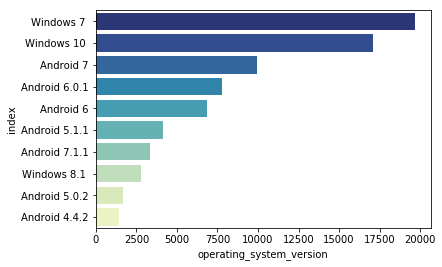

In [64]:
p = df['operating_system_version'].value_counts().head(10).to_frame().reset_index()
sns.barplot(data=p,x='operating_system_version',y='index',palette="YlGnBu_r")

In [26]:
df['operating_system_version'].value_counts()

Windows 7             19675
Windows 10            17110
Android 7              9964
Android 6.0.1          7805
Android 6              6871
Android 5.1.1          4123
Android 7.1.1          3325
Windows 8.1            2781
Android 5.0.2          1640
Android 4.4.2          1402
iOS 11.3               1345
Android 4.4.4          1288
Android 5.1            1269
Android 8               973
Android 5.0.1           746
iOS 10.3.3              738
Windows 8               732
Windows XP              613
Android 4.2.2           566
Android 4.1.2           519
Android 5               321
Android 4.3             318
Linux                   293
iOS 11.2.6              286
iOS 9.3.5               268
Windows Phone 10        252
iOS 11.4                231
Windows Phone 8.1       200
iOS 11.2.5              147
Android 7.1.2           141
                      ...  
Mac OS X 10.11.3          2
Android 3.1               2
iOS 5.0.1                 2
Mac OS X 10.10.2          2
Mac OS X 10.7.5     

In [83]:
def funcion(x):
    return ', '.join(sorted(x['operating_system_version'].fillna('No informa').unique()))

sistemas = df.loc[df.event=='visited site'].groupby('person').apply(funcion)

In [84]:
sistemas.head()

person
0004b0a2        Android 6
0006a21a    Android 5.1.1
000a54b2      Windows 10 
00184bf9      Windows 10 
0019c395        Android 6
dtype: object

In [85]:
sistemas = sistemas.reset_index()

In [86]:
sistemas['compro'] = sistemas['person'].isin(df.loc[df.event=='conversion']['person'])

In [87]:
sistemas

,person,0,compro
0,0004b0a2,Android 6,False
1,0006a21a,Android 5.1.1,False
2,000a54b2,Windows 10,False
3,00184bf9,Windows 10,False
4,0019c395,Android 6,False
5,001bb7eb,Windows 7,False
6,001f1653,Android 6,False
7,00204059,"Windows 10 , Windows 7",True
8,0024a82b,Windows 7,False
9,0024ad28,Windows 7,False


In [88]:
sistemas.columns=['Persona','Sistemas','Compro']

In [89]:
sistemas['Sistemas'] = sistemas['Sistemas'].astype(str)

In [90]:
compras = sistemas.groupby('Sistemas').agg({'Compro':'sum'})

# Cantidad de personas que compraron segun desde que dispositivos ingresaron

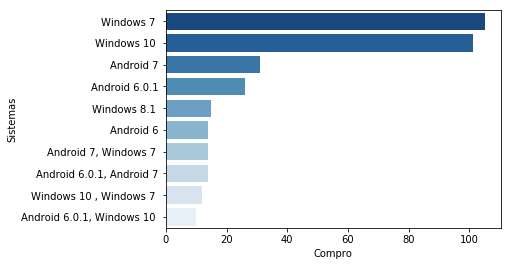

In [102]:
c = compras.sort_values('Compro',ascending=False).reset_index()
sns.barplot(data=c.head(10),y='Sistemas',x='Compro',palette='Blues_r')

# Cuantas personas ingresaron al site desde estos dispositivos

In [103]:
p = sistemas['Sistemas'].value_counts().to_frame().reset_index()

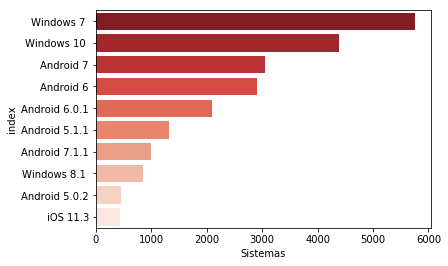

In [104]:
sns.barplot(data=p.head(10),x='Sistemas',y='index',palette='Reds_r')

In [101]:
c

,Sistemas,Compro
0,Windows 7,105.0
1,Windows 10,101.0
2,Android 7,31.0
3,Android 6.0.1,26.0
4,Windows 8.1,15.0
5,Android 6,14.0
6,"Android 7, Windows 7",14.0
7,"Android 6.0.1, Android 7",14.0
8,"Windows 10 , Windows 7",12.0
9,"Android 6.0.1, Windows 10",10.0


In [ ]:
p = p.set_index('index')
c = c.set_index('Sistemas')

In [118]:
joined = p.join(c)
joined

,Sistemas,Compro
index,,
Windows 7,5755,105.0
Windows 10,4392,101.0
Android 7,3053,31.0
Android 6,2899,14.0
Android 6.0.1,2102,26.0
Android 5.1.1,1317,8.0
Android 7.1.1,991,7.0
Windows 8.1,852,15.0
Android 5.0.2,461,4.0


In [119]:
joined = joined.reset_index()

In [120]:
joined.columns=['Sistemas','Visitas','Compras']

In [236]:
joined.head()

,Sistemas,Visitas,Compras
0,Windows 7,5755,105.0
1,Windows 10,4392,101.0
2,Android 7,3053,31.0
3,Android 6,2899,14.0
4,Android 6.0.1,2102,26.0


In [240]:
sistemas.head()

,Persona,Sistemas,Compro
0,0004b0a2,Android 6,False
1,0006a21a,Android 5.1.1,False
2,000a54b2,Windows 10,False
3,00184bf9,Windows 10,False
4,0019c395,Android 6,False


# Relacion entre personas que utilizan el sistema operativo vs personas que compraron utilizando el mismo

Text(0.5,0,'Personas que visitaron/compraron')

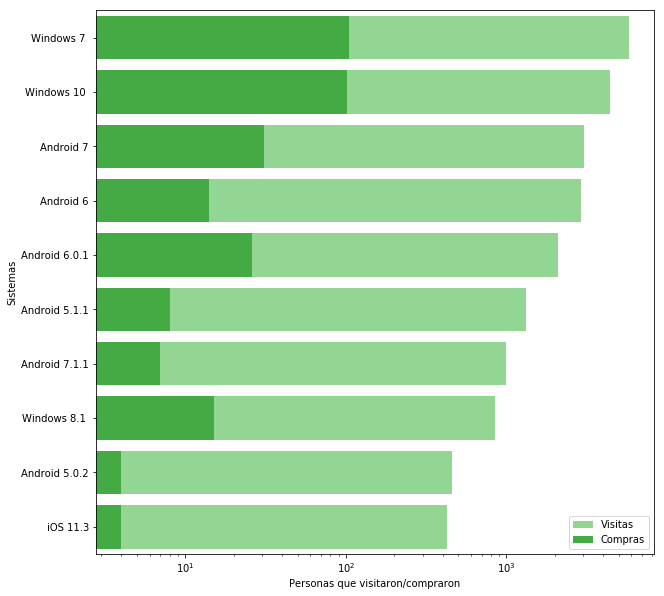

In [276]:
fig,ax = plt.subplots(figsize=(10,10))

g = sns.countplot(data=sistemas,y='Sistemas',order=sistemas['Sistemas'].value_counts().head(10).index,color='#88e088')
g = sns.countplot(data=sistemas.loc[sistemas.Compro==True],y='Sistemas',order=sistemas['Sistemas'].value_counts().head(10).index,color='#33bb33')
plt.xscale('log')
plt.legend(['Visitas','Compras'])
g.set_xlabel('Personas que visitaron/compraron')
